<a href="https://colab.research.google.com/github/akiwelekar/5CI_quantumPhenomenon/blob/main/FiveCounterIntuitive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

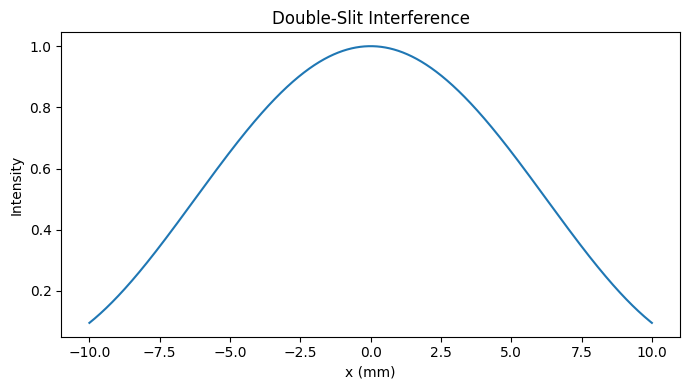

In [1]:
import numpy as np, matplotlib.pyplot as plt

def double_slit_interference(num_points=2000, wavelength=500e-9, slit_sep=20e-6, screen_dist=1.0, screen_width=0.02):
    k = 2*np.pi/wavelength
    x = np.linspace(-screen_width/2, screen_width/2, num_points)
    phase = k*slit_sep*x/screen_dist
    E = 1 + np.exp(1j*phase)
    I = (E*np.conjugate(E)).real
    return x, I/np.max(I)

x, I = double_slit_interference()
plt.figure(figsize=(7,4)); plt.plot(x*1e3, I)
plt.xlabel("x (mm)"); plt.ylabel("Intensity"); plt.title("Double-Slit Interference"); plt.tight_layout(); plt.show()


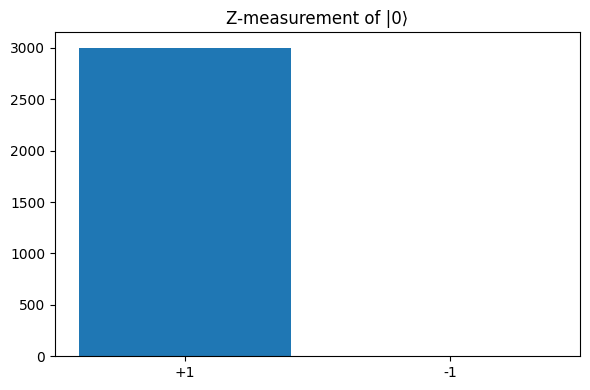

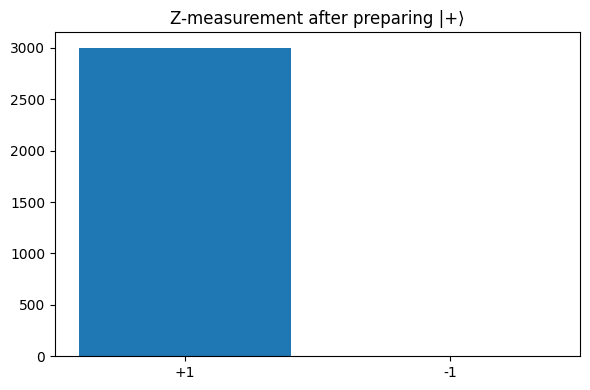

In [3]:
import numpy as np, matplotlib.pyplot as plt

H = (1/np.sqrt(2))*np.array([[1,1],[1,-1]], dtype=complex)

def measure_z(state):
    p_up = np.abs(state[0])**2
    return +1 if np.random.rand() < p_up else -1

def hist_superposition(num_shots=2000, basis="Z"):
    state = np.array([1+0j, 0+0j])              # |0>
    if basis.upper()=="X": state = H @ state    # |+>
    counts = {+1:0, -1:0}
    for _ in range(num_shots):
        st = state if basis=="Z" else H @ state # X-measure ≡ rotate then Z-measure
        outcome = measure_z(st)
        counts[outcome]+=1
    return counts

cZ = hist_superposition(3000, "Z")
cX = hist_superposition(3000, "X")
plt.figure(figsize=(6,4)); plt.bar(["+1","-1"], [cZ[+1], cZ[-1]]); plt.title("Z-measurement of |0⟩"); plt.tight_layout(); plt.show()
plt.figure(figsize=(6,4)); plt.bar(["+1","-1"], [cX[+1], cX[-1]]); plt.title("Z-measurement after preparing |+⟩"); plt.tight_layout(); plt.show()


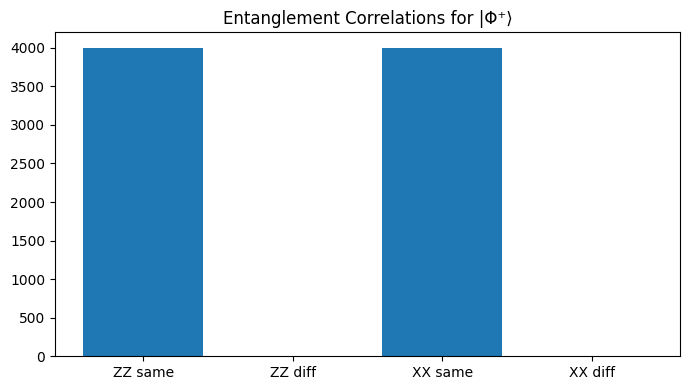

In [4]:
import numpy as np, matplotlib.pyplot as plt

def bell_phi_plus():
    st = np.zeros(4, dtype=complex); st[0]=st[3]=1/np.sqrt(2)  # |00> and |11>
    return st

def measure_two_z(state):
    probs = np.abs(state)**2; probs /= probs.sum()
    idx = np.searchsorted(np.cumsum(probs), np.random.rand())
    outcome_map = {0:(+1,+1),1:(+1,-1),2:(-1,+1),3:(-1,-1)}
    return outcome_map[idx]

H = (1/np.sqrt(2))*np.array([[1,1],[1,-1]], dtype=complex)
H2 = np.kron(H,H)

def measure_two_x(state): return measure_two_z(H2 @ state)

st = bell_phi_plus()
cZZ, cXX = {"same":0,"different":0}, {"same":0,"different":0}
for _ in range(4000):
    a,b = measure_two_z(st);  cZZ["same" if a==b else "different"] += 1
    a,b = measure_two_x(st);  cXX["same" if a==b else "different"] += 1

plt.figure(figsize=(7,4))
plt.bar(["ZZ same","ZZ diff","XX same","XX diff"], [cZZ["same"],cZZ["different"],cXX["same"],cXX["different"]])
plt.title("Entanglement Correlations for |Φ⁺⟩"); plt.tight_layout(); plt.show()


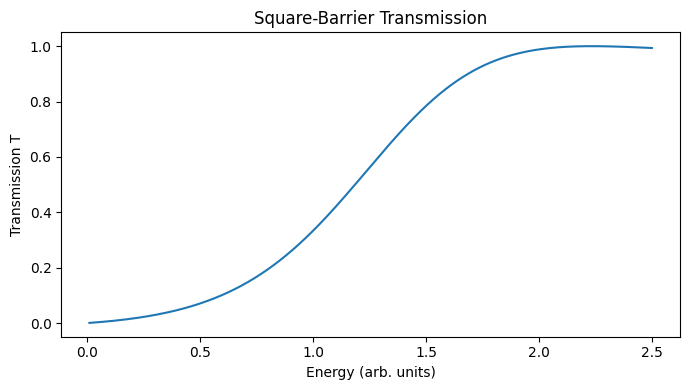

In [5]:
import numpy as np, matplotlib.pyplot as plt

def T_square(E, V0=1.0, a=1.0, m=1.0, hbar=1.0):
    E = np.array(E, float)
    T = np.zeros_like(E)
    mask = E < V0
    # E < V0
    if np.any(mask):
        kappa = np.sqrt(2*m*(V0 - E[mask]))/hbar
        denom = 1 + (V0**2 * np.sinh(kappa*a)**2)/(4*E[mask]*(V0 - E[mask]))
        T[mask] = 1/denom
    # E >= V0
    if np.any(~mask):
        q = np.sqrt(2*m*(E[~mask]-V0))/hbar
        denom = 1 + (V0**2 * np.sin(q*a)**2)/(4*E[~mask]*(E[~mask]-V0))
        T[~mask] = 1/denom
    return T

E = np.linspace(0.01, 2.5, 800)
plt.figure(figsize=(7,4)); plt.plot(E, T_square(E, V0=1.0, a=2.0))
plt.xlabel("Energy (arb. units)"); plt.ylabel("Transmission T"); plt.title("Square-Barrier Transmission"); plt.tight_layout(); plt.show()


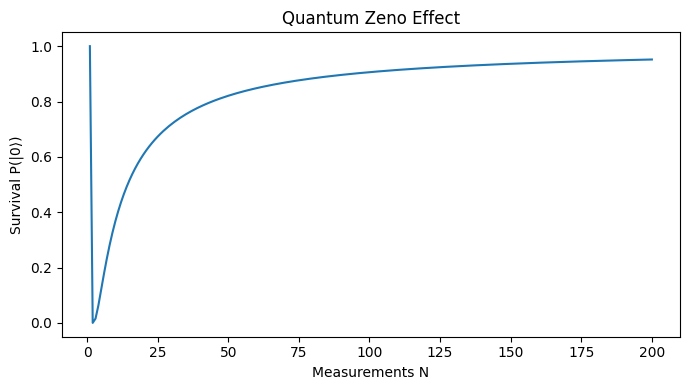

In [6]:
import numpy as np, matplotlib.pyplot as plt

def zeno_survival(T=1.0, omega=2*np.pi, N=1):
    theta = omega*(T/N)/2
    p_one = (np.cos(theta))**2
    return p_one**N

Ns = np.arange(1, 200+1)
P = np.array([zeno_survival(1.0, 2*np.pi, n) for n in Ns])
plt.figure(figsize=(7,4)); plt.plot(Ns, P)
plt.xlabel("Measurements N"); plt.ylabel("Survival P(|0⟩)"); plt.title("Quantum Zeno Effect"); plt.tight_layout(); plt.show()
